# Homework # 4: Unsupervised Learning

## Question 1.

Using the MNIST dataset, perform the following (Note that you may need to perform sampling
to reduce the amount of data or perform PCA to reduce the dimensionality of each example
beforehand):

In [57]:
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import random

In [58]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
y_train.shape

(60000,)

We used the MNIST dataset from keras.dataset by using the load_data() function. By default, we get the shape of X_train as (60000,28,28) and for y_train as (60000,)

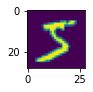

In [61]:
plt.subplot(250 + 1 + 0)
plt.imshow(X_train[0])
plt.show()

We just printed out the 1st value from the dataset to ensure that the dataset has been correctly downloaded.

In [62]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])

As PCA works only for 2-Dimensional arrays, and we have a 3 Dimensional array for X_train with dimensions: 60000,28,28, we convert it into a 2-D array by combining the 2nd and 3rd indices.

In [63]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_train.shape

(60000, 784)

We have scaled the dataset using StandardScaler() to improve and clean the data.

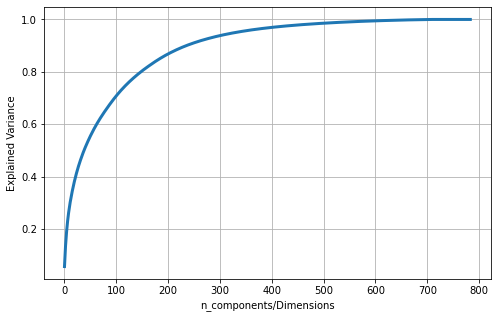

In [64]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

plt.figure(1, figsize=(8, 5))

plt.clf()
plt.plot(cumsum, linewidth=3)
plt.grid()
plt.xlabel('n_components/Dimensions')
plt.ylabel('Explained Variance')
plt.show()

We will be aiming to reduce the dimensions of the data from 784 to a smaller value using PCA dimensionality reduction. Based on the explained_variance_ratio graph for the above dataset, we need to find out a value from where the explained variance stops growing fast. An ideal value for this could be 0.91, which would yield roughly 250 dimensions, which is almost one-third of 784 dimensions.

Perform K-means clustering using an appropriate value for K, where the clusters are initialized from random data from the dataset. Discuss how you selected the appropriate value for K.

In [65]:
random_indices=[]
unique=[]
for i in range(60000):
    random_indices.append(i)
random_indices=np.asarray(random_indices)
np.random.shuffle(random_indices)

X_train_random=X_train[random_indices]
y_train_random=y_train[random_indices]

In [66]:
pca = PCA(0.91)
X_train_random = pca.fit_transform(X_train_random)

In [67]:
X_train_random.shape

(60000, 250)

We initially shuffle the indices randomly from the training dataset as we will be assigning these to the clusters, and it is better to have a random shuffle. We later do the pca.fit_transform with variance_ratio as 0.91 which generates 250 dimensions after reduction.

In [68]:
sample_indices = random.sample(range(X_train.shape[0]), k=5000)
sample_X_train = X_train[sample_indices]
sample_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

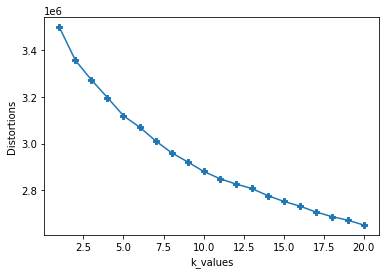

In [69]:
k_values = 20
distortions = []
for i in range(1, k_values + 1):
    kmeans = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(sample_X_train)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, k_values + 1), distortions, marker='P')
plt.xlabel('k_values')
plt.ylabel('Distortions')
plt.show()

To evaluate a proper value of K in K means cluster, we will be using the elbow method. To achieve that we have used a sample list of 5000 elements and will be running it for 20 different values. As we can see from the plot, we are not getting a proper elbow point for which we can easily decide the value of K. However we can roughly see that the curve tends to bend between value 10 to 12.5. Also we already know that the number of classes in MNIST dataset is equal to the number of digits which is 10. So due the above reasons, it would be wise to choose 10 as the appropiate value of K, that is number of clusters.

In [70]:
kmeans1 = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, random_state=42)
label1 = kmeans1.fit_predict(X_train_random)
centroids1 = kmeans1.cluster_centers_
centroids1.shape

(10, 250)

We will now be running the KMeans clustering algorithm using the random method on X_train_random dataset which consists of 60000 inputs. We implement this by specifying init='random' in the KMeans function call. Alog with this we have defined n_clusters as 10, n_init as 10, maximum iterations as 300 and random_state as 42. We then use the fit_predict method on the dimensionality reduced PCA dataset and store the cluster labels in label1. Also we store the centroid of each of the cluster in centroids1.

In [71]:
label1 is kmeans1.labels_

True

By checking the above thing, we can verify that the labels have been assigned in the correct variable and we can proceed further towards plotting the clusters.

In [72]:
unique_labels1 = np.unique(label1)
unique_labels1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

The unique_labels1 store the unique values from label1, i.e. the 10 different digits. These will be used to plot the clusters.

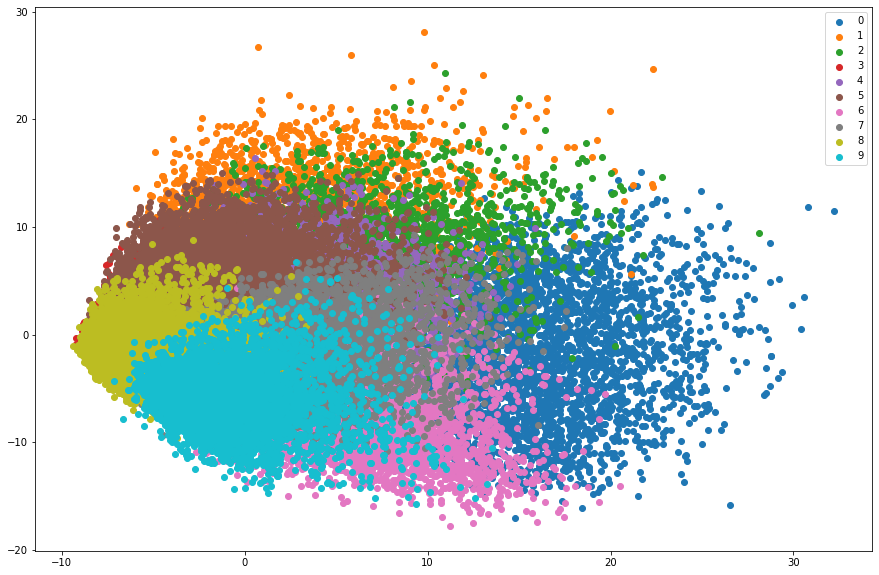

In [73]:
plt.figure(1, figsize=(15, 10))
for i in unique_labels1:
    plt.scatter(X_train_random[label1 == i , 0] , X_train_random[label1 == i , 1] , label = i)
plt.legend()

plt.show()

The above code helps us to plot the centroid for all the dimensions. We can see the clustering seems to have taken place well, except for a few outliers which are likely to occur due the large size of the dataset.

For the appropriate value of K that was selected, display the cluster centroids. Discuss the similarities and differences between the centroids, and how they relate to the labels of the data, if at all.

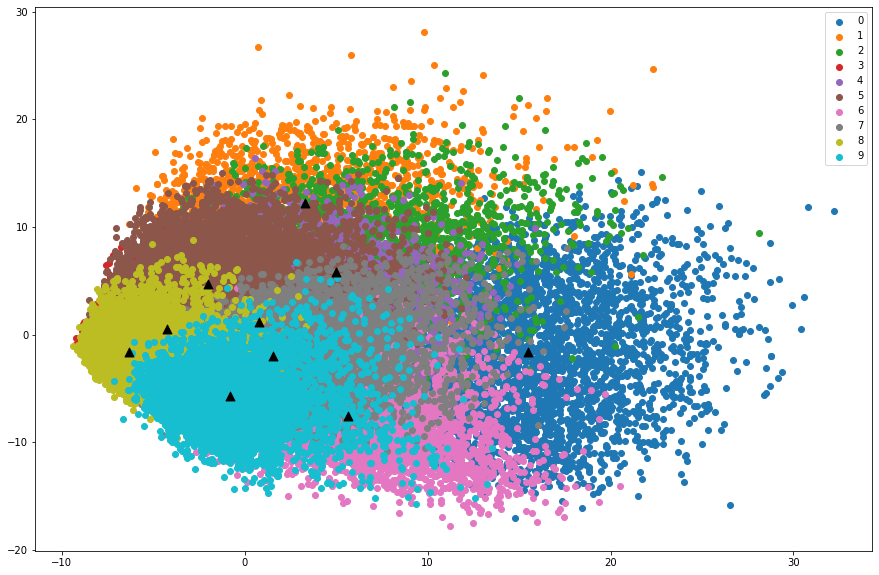

In [74]:
plt.figure(1, figsize=(15, 10))
for i in unique_labels1:
    plt.scatter(X_train_random[label1 == i , 0] , X_train_random[label1 == i , 1] , label = i)
    
plt.scatter(centroids1[:,0] , centroids1[:,1] , s = 80, color = 'k',marker='^')
plt.legend()
plt.show()

As we had chosen the value of k as 10, we have plotted 10 different clusters which are well grouped together except for a few outliers. We have also plotted the centroids of each of the cluster. Each cluster has been represented with a different colour to identify its cluster properly.

The centroids are imaginary values in each cluster(1) which is the arithmetic mean location of all its elements of that cluster and from where the total variance for each is the lowest. As this is a 2-D plot, we sometimes see some overlap between the clusters, hence some of the centroid from the plot appear on other clusters, however they are actually a part of on the overlapped cluster and because the cluster centroids are imaginary locations.

Repeat the above, using k-means++ initialization

In [75]:
kmeans2 = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=42)
label2 = kmeans2.fit_predict(X_train_random)
centroids2 = kmeans2.cluster_centers_
centroids2.shape

(10, 250)

We again call the KMeans function, but this time with a small change, i.e. with init='kmeans++'. The kmeans++ method basically initializes the clusters in a smarter method as compared to the random method. It selects from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest previous centroid.

In [76]:
label2 is kmeans2.labels_

True

In [77]:
unique_labels2 = np.unique(label2)
unique_labels2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

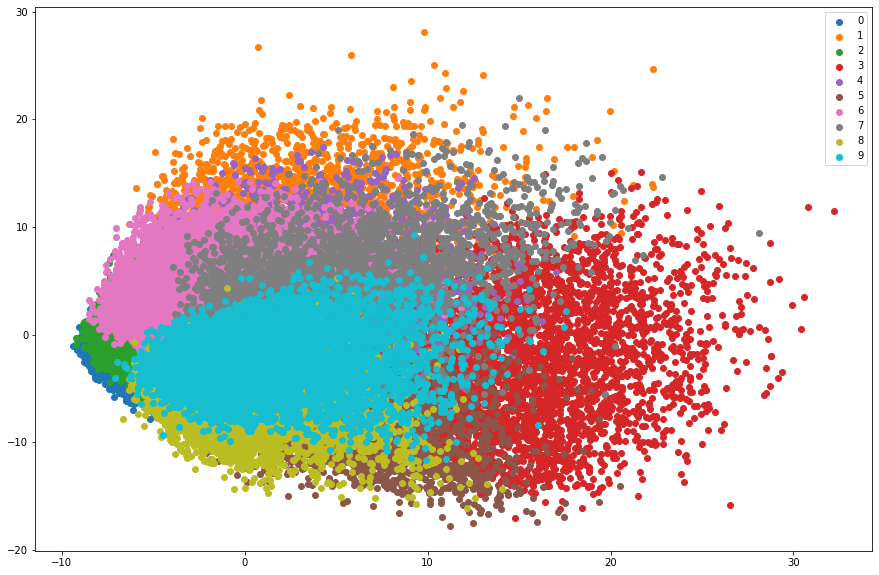

In [78]:
plt.figure(1, figsize=(15, 10))
for i in unique_labels2:
    plt.scatter(X_train_random[label2 == i , 0] , X_train_random[label2 == i , 1] , label = i)
plt.legend()

plt.show()

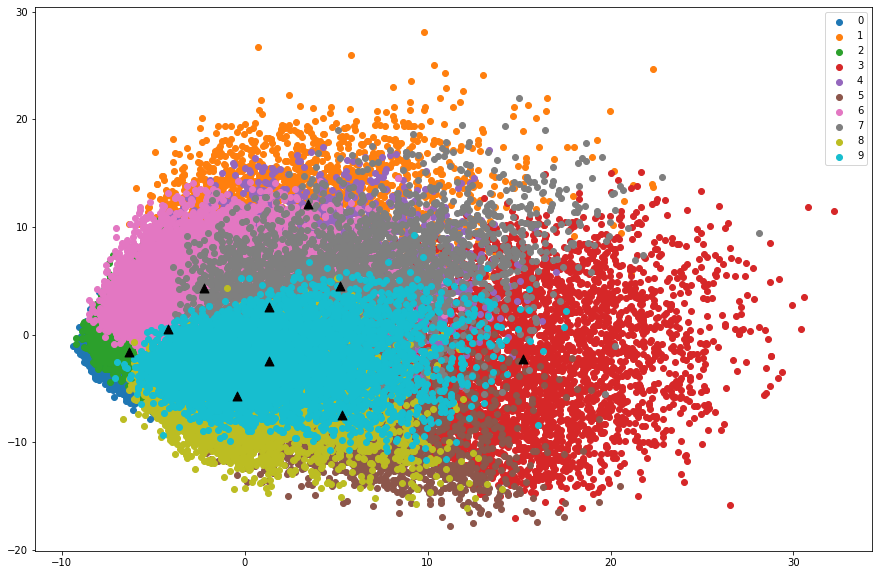

In [79]:
plt.figure(1, figsize=(15, 10))
for i in unique_labels2:
    plt.scatter(X_train_random[label2 == i , 0] , X_train_random[label2 == i , 1] , label = i)
plt.scatter(centroids2[:,0] , centroids2[:,1] , s = 80, color = 'k',marker='^')
plt.legend()
plt.show()

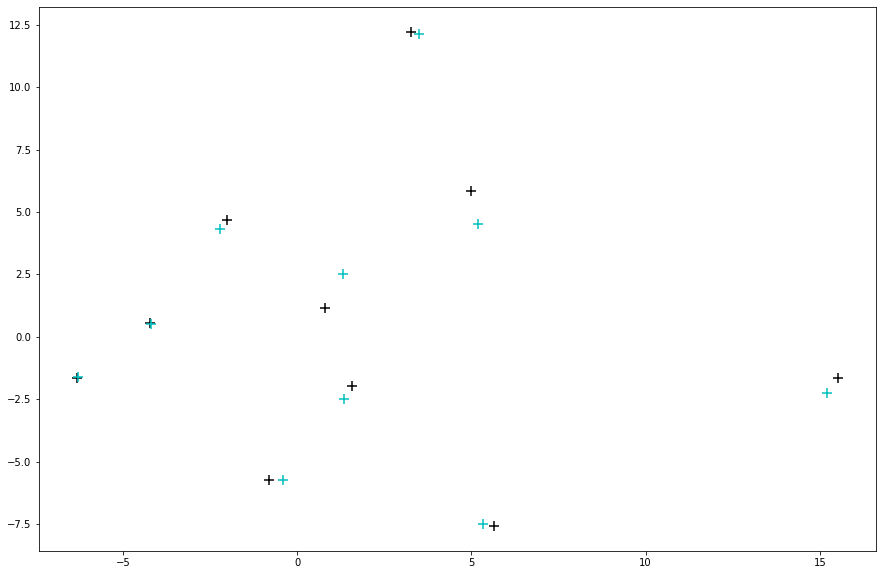

In [81]:
plt.figure(1, figsize=(15, 10))
plt.scatter(centroids1[:,0] , centroids1[:,1] , s = 100, color = 'k',marker='+')
plt.scatter(centroids2[:,0] , centroids2[:,1] , s = 100, color = 'c',marker='+')

The centroid1 values are marked in Black + symbol, whereas the centroid2 values are marked in Blue + symbol. As we can see, the centroid points for a particular cluster are very near to each other for random and kmeans++ init method. In some cases it completely overlaps with each other. As eventually the cluster combine well after 300 iterations, hence the centroid values are more or less similar to each other. Each centroid represents arithmetic mean location of all its elements of that cluster and from where the total variance for each is the lowest.

Now assume that you have labeled information. Randomly choose 1 sample from each of the classes to serve as the initial cluster centers. Run the K-means algorithm. Display the final and initial cluster centroids. Compare and contrast the initial cluster centers to the final cluster centers. Do they still represent the labels?

In [82]:
init_list=[]

for i in unique_labels2:
    init_list.append(random.choice(X_train_random[label2 == i]))

In [83]:
init_list=np.asarray(init_list)
init_list.shape

(10, 250)

The init_list array stores an element from each cluster and it acts as an initial centroid value. It needs to defined as an ndarray. We have assumed the clusters which have been formed above by the kmeans++ method, hence we are selecting them from label2, which consists of the correct labels from kmeans++ method.

In [84]:
kmeans3 = KMeans(n_clusters=10, init=init_list,n_init=10, max_iter=300, random_state=0)
label3 = kmeans3.fit_predict(X_train_random)
centroids3 = kmeans3.cluster_centers_
centroids3.shape

/home/chaitanya/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


(10, 250)

We repeat the same process as above except for a change that init is defined by the init_list.

In [85]:
label3 is kmeans3.labels_

True

In [86]:
unique_labels3 = np.unique(label3)
unique_labels3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

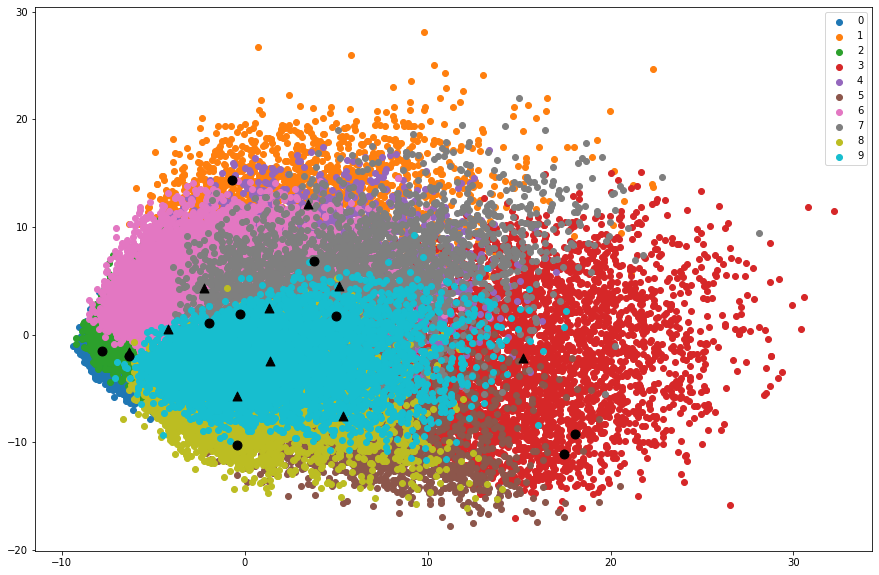

In [87]:
plt.figure(1, figsize=(15, 10))
for i in unique_labels3:
    plt.scatter(X_train_random[label3 == i , 0] , X_train_random[label3 == i , 1] , label = i)
plt.scatter(centroids3[:,0] , centroids3[:,1] , s = 80, color = 'k',marker='^')
plt.scatter(init_list[:,0] , init_list[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

The initial centroids from init_list(random list) are represented by Black circle where as the final centroids after KMeans clustering are represented by the Black triangle. Since the initial values were selected randomly from correct previous clusters, one thing is sure that the initial cluster centroid belonged to its corresponding cluster. However as we continue with the 300 iterations of the KMeans clustering algorithm, the centroid value now moves towards it correct location as it is desired to be the mean value of a particular cluster. Thus a new centroid location can be seen in the end. Under a very low probability, it is possible that the cluster centroid will not move, when the random value selected in init_list is very close to its previous centroid.

Each centroid still represents its corresponding label, its just that its location will now change.

How do the cluster centroids compare for the above three approaches?

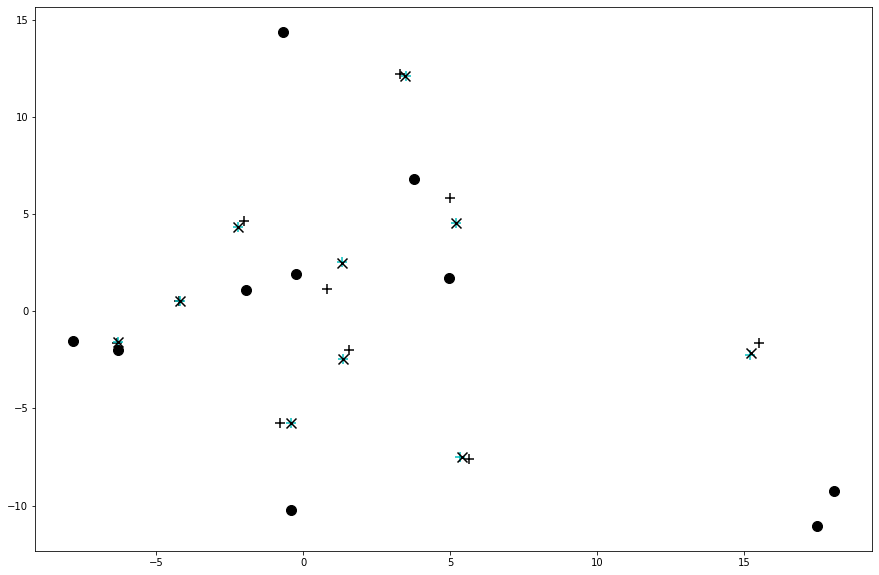

In [90]:
plt.figure(1, figsize=(15, 10))
plt.scatter(centroids1[:,0] , centroids1[:,1] , s = 100, color = 'k',marker='+')
plt.scatter(centroids2[:,0] , centroids2[:,1] , s = 100, color = 'c',marker='+')
plt.scatter(centroids3[:,0] , centroids3[:,1] , s = 100, color = 'k',marker='x')
plt.scatter(init_list[:,0] , init_list[:,1] , s = 100, color = 'k',marker='o')

1. The centroids from KMeans algorithm using init='random' method are represented by Black+ symbol(centroid1).
2. The centroids using the init='kmeans++' method are represented using the Blue+ symbol(centroid2)
3. The centroids using the init=init_list method are represented using the Black x symbol.
4. The random initial centroids chosen for the init=init_list method are represented by the Black Circle symbol.

As we can see from the above plots, it seems that for all the 3 methods, the cluster centroids are more or less very near each other after 300 iterations as the centroid values are means of that particular cluster. In many cases, the values from random method and the init_list method, the centroids seem to overlap with each other. As kmeans++ method is more smarter way of implementation, it tends to be a bit apart from those two for some cases.  Each centroid represents arithmetic mean location of all its elements of that cluster and from where the total variance for each is the lowest. If we might increase the number of iterations even more, it is likely that all the cluster centroid might overlap with each other. 

Compute the variance (as shown in class) for each of the three approaches. How do they compare?

In [103]:
variance1 = 0
for i, j in enumerate(label1):
    variance1 += np.linalg.norm((X_train_random[i] - centroids1[j]))
    
variance2 = 0
for i, j in enumerate(label2):
    variance2 += np.linalg.norm((X_train_random[i] - centroids2[j]))
    
variance3 = 0
for i, j in enumerate(label3):
    variance3 += np.linalg.norm((X_train_random[i] - centroids3[j]))

print("Variance for init='random' method is", variance1)
print("Variance for init='kmeans++' method is", variance2)
print("Variance for init=init_list method is", variance3)

Variance for init='random' method is 1172124.062518453
Variance for init='kmeans++' method is 1172333.8193474268
Variance for init=init_list method is 1172323.0204486437


We evaluate the variance using the formula as given in Dr. Williamson's slides in Lec22_KMeans_P556.pdf.

∑ ∑| | xi − uj | |, where xi is a value from the dataset and uj is mean/centroid value.

Hence we evaluate the variance values for all 3 methods using np.linalg.norm method from numpy.

We also have an inbuilt function named kmeans.inertia_ which takes the sum of the squares of the differences of the xi value and centroid value. We have also verified the correctness by calculating the inertia of the values. And the values match correctly.

In [104]:
print("Inertia for init='random' method is",kmeans1.inertia_)
print("Inertia for init='kmeans++' method is",kmeans2.inertia_)
print("Inertia for init=init_list is",kmeans3.inertia_)

Inertia for init='random' method is 32505403.82937833
Inertia for init='kmeans++' method is 32504184.908969384
Inertia for init=init_list is 32504177.88239601


In [105]:
variance1 = 0
for i, j in enumerate(label1):
    variance1 += np.square(np.linalg.norm((X_train_random[i] - centroids1[j])))
    
variance2 = 0
for i, j in enumerate(label2):
    variance2 += np.square(np.linalg.norm((X_train_random[i] - centroids2[j])))
    
variance3 = 0
for i, j in enumerate(label3):
    variance3 += np.square(np.linalg.norm((X_train_random[i] - centroids3[j])))

print("Inertia for init='random' method is", variance1)
print("Inertia for init='kmeans++' method is", variance2)
print("Inertia for init=init_list method is", variance3)

Inertia for init='random' method is 32505403.82937833
Inertia for init='kmeans++' method is 32504184.908969387
Inertia for init=init_list method is 32504177.88239601


The variance values are similar to each other for all 3 methods: random, kmeans++ and init_list method. However due to the random initializations, it causes some difference in the variance values. The variance similarity can also be seen from the cluster centroid plots, where in the differences between the cluster centroids is very less.

However the Inertia and Variance values are more close to each other in case of the kmeans++(1172333) and init_list method(1172323). Only the random method (1172124) variance value is a bit different.